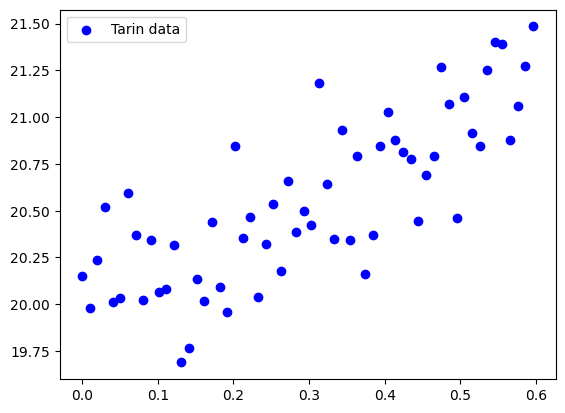

In [24]:
import numpy as Numpy
import matplotlib.pyplot as Pyplot

trainData = Numpy.loadtxt("lab_1_train.csv", skiprows=1, usecols=(1, 2), delimiter=',')
testData = Numpy.loadtxt("lab_1_test.csv", skiprows=1, usecols=(1, 2), delimiter=',')

Pyplot.scatter(trainData[:,0], trainData[:,1], label="Tarin data", color="blue")
Pyplot.legend()

In [36]:
def meanSquaredError(actualY, predictedY):
  return Numpy.mean((actualY - predictedY) ** 2)

def gradDesc(xList, yList, alpha, threshold, numOfIterations):
    currBias = min(yList)
    currWeight = 1.0
    prevCost = None
    n = float(len(xList))

    for i in range(numOfIterations):
        predictedY = currBias + (currWeight * xList)
        currCost = meanSquaredError(yList, predictedY)

        if prevCost and abs(prevCost - currCost) <= threshold:
            break
            
        prevCost = currCost
        #gradient calculation
        biasGrad = - (2 / n) * Numpy.sum(yList - predictedY)
        weightGrad = - (2 / n) * Numpy.sum(xList * (yList - predictedY))

        currBias = currBias - (alpha * biasGrad)
        currWeight = currWeight - (alpha * weightGrad)
        
        print(f"epoch: {i + 1}; bias: {currBias}; weight: {currWeight}; MSE: {currCost}")

    return currBias, currWeight

bias, weight = gradDesc(trainData[:,0], trainData[:,1], 0.1, 1e-6, 1000)

epoch: 1; bias: 19.801230429994867; weight: 1.039539306330187; MSE: 0.4192538713910219
epoch: 2; bias: 19.888944639705116; weight: 1.0714246684618707; MSE: 0.2923749595606787
epoch: 3; bias: 19.957215768720015; weight: 1.0973212429722938; MSE: 0.2147523161248505
epoch: 4; bias: 20.010289340723737; weight: 1.1185307622728209; MSE: 0.16723118509091617
epoch: 5; bias: 20.05148419667143; weight: 1.1360708592789215; MSE: 0.1381060704234134
epoch: 6; bias: 20.083394762517102; weight: 1.1507370778309483; MSE: 0.12022372432905494
epoch: 7; bias: 20.108049167825385; weight: 1.1631513480587652; MSE: 0.10921278131151715
epoch: 8; bias: 20.1270328517251; weight: 1.1737998809962154; MSE: 0.10240188626692902
epoch: 9; bias: 20.141585189306177; weight: 1.183062791913026; MSE: 0.09815856178313029
epoch: 10; bias: 20.152675027306298; weight: 1.1912372577426686; MSE: 0.09548518946914966
epoch: 11; bias: 20.161059732571093; weight: 1.1985556199234793; MSE: 0.09377211385359842
epoch: 12; bias: 20.16733135

bias: 19.976336049476952; weight: 1.9252556390167437; MSE: 0.07312296218533056


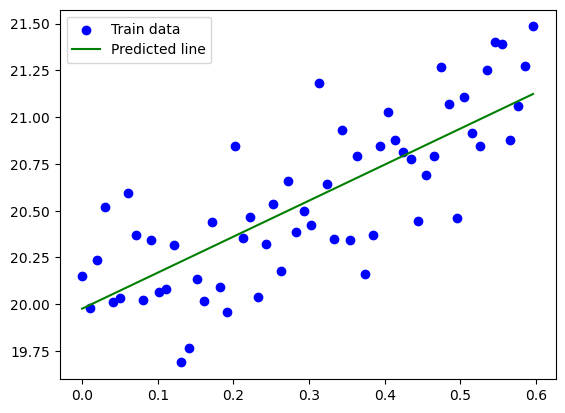

In [37]:
trainPredictedY = bias + (weight * trainData[:,0])
MSE = meanSquaredError(trainData[:,1], trainPredictedY)
print(f"bias: {bias}; weight: {weight}; MSE: {MSE}")

Pyplot.scatter(trainData[:,0], trainData[:,1], label="Train data", color="blue")
Pyplot.plot(trainData[:,0], trainPredictedY, label="Predicted line", color="green")
Pyplot.legend()

MSE: 0.07876757038943898


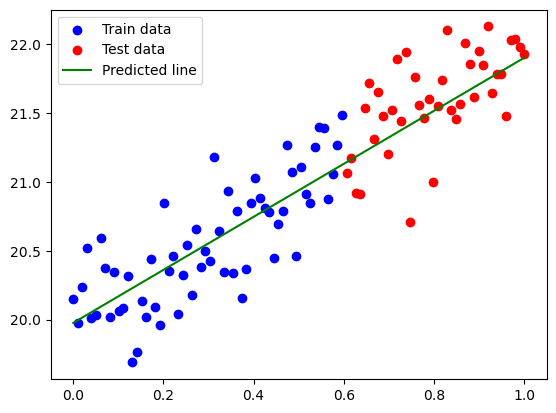

In [38]:
testPredictedY = bias + (weight * testData[:,0])
testError = meanSquaredError(testData[:,1], testPredictedY)
print(f"MSE: {testError}")

Pyplot.scatter(trainData[:,0], trainData[:,1], label="Train data", color="blue")
Pyplot.scatter(testData[:,0], testData[:,1], label="Test data", color="red")
Pyplot.plot((min(trainData[:,0]), max(testData[:,0])),(min(trainPredictedY), max(testPredictedY)), label="Predicted line", color="green")
Pyplot.legend()